In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
# from scipy.stats import norm, uniform, multivariate_normal as multinorm, norm
from scipy.stats.mstats import mquantiles
# from tqdm import tqdm
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=8)
plt.style.use('dean_style.conf')
from pertussis import *
logger.setLevel(logging.INFO)

# Load Simulation

In [2]:
# simulation = load_mcmc('./simulations/rho-60-36k.pkl')
# simulation = load_mcmc('./simulations/1121-rho-70-36k.pkl')
simulation = load_mcmc('./simulations/1121-rho-70-with-dynamic.pkl')
mcmc = simulation['mcmc']
create_pairwise(simulation)
policies = simulation['policies']
default = policies[0]
metric_names = ['sick','hospital','vaccines']
age_names = ['0-1','1-21','21+']
cover = np.array(simulation['pregnant_coverage'])
print (len(simulation['policies']))
print (len(simulation['p']))

30
5000


In [3]:
policies[3]['sick_pct']

array([-10.2299, -10.4392, -13.4186, -11.221 ,  -8.8052, -10.8999, -17.2563,
       -10.8631, -12.5401, -10.1311, ..., -10.9747, -13.1689, -10.8294,
       -11.1934,  -9.2802, -11.8091, -12.5666, -10.7038,  -9.7633, -16.7858])

# Charts

## Pregnant Coverage

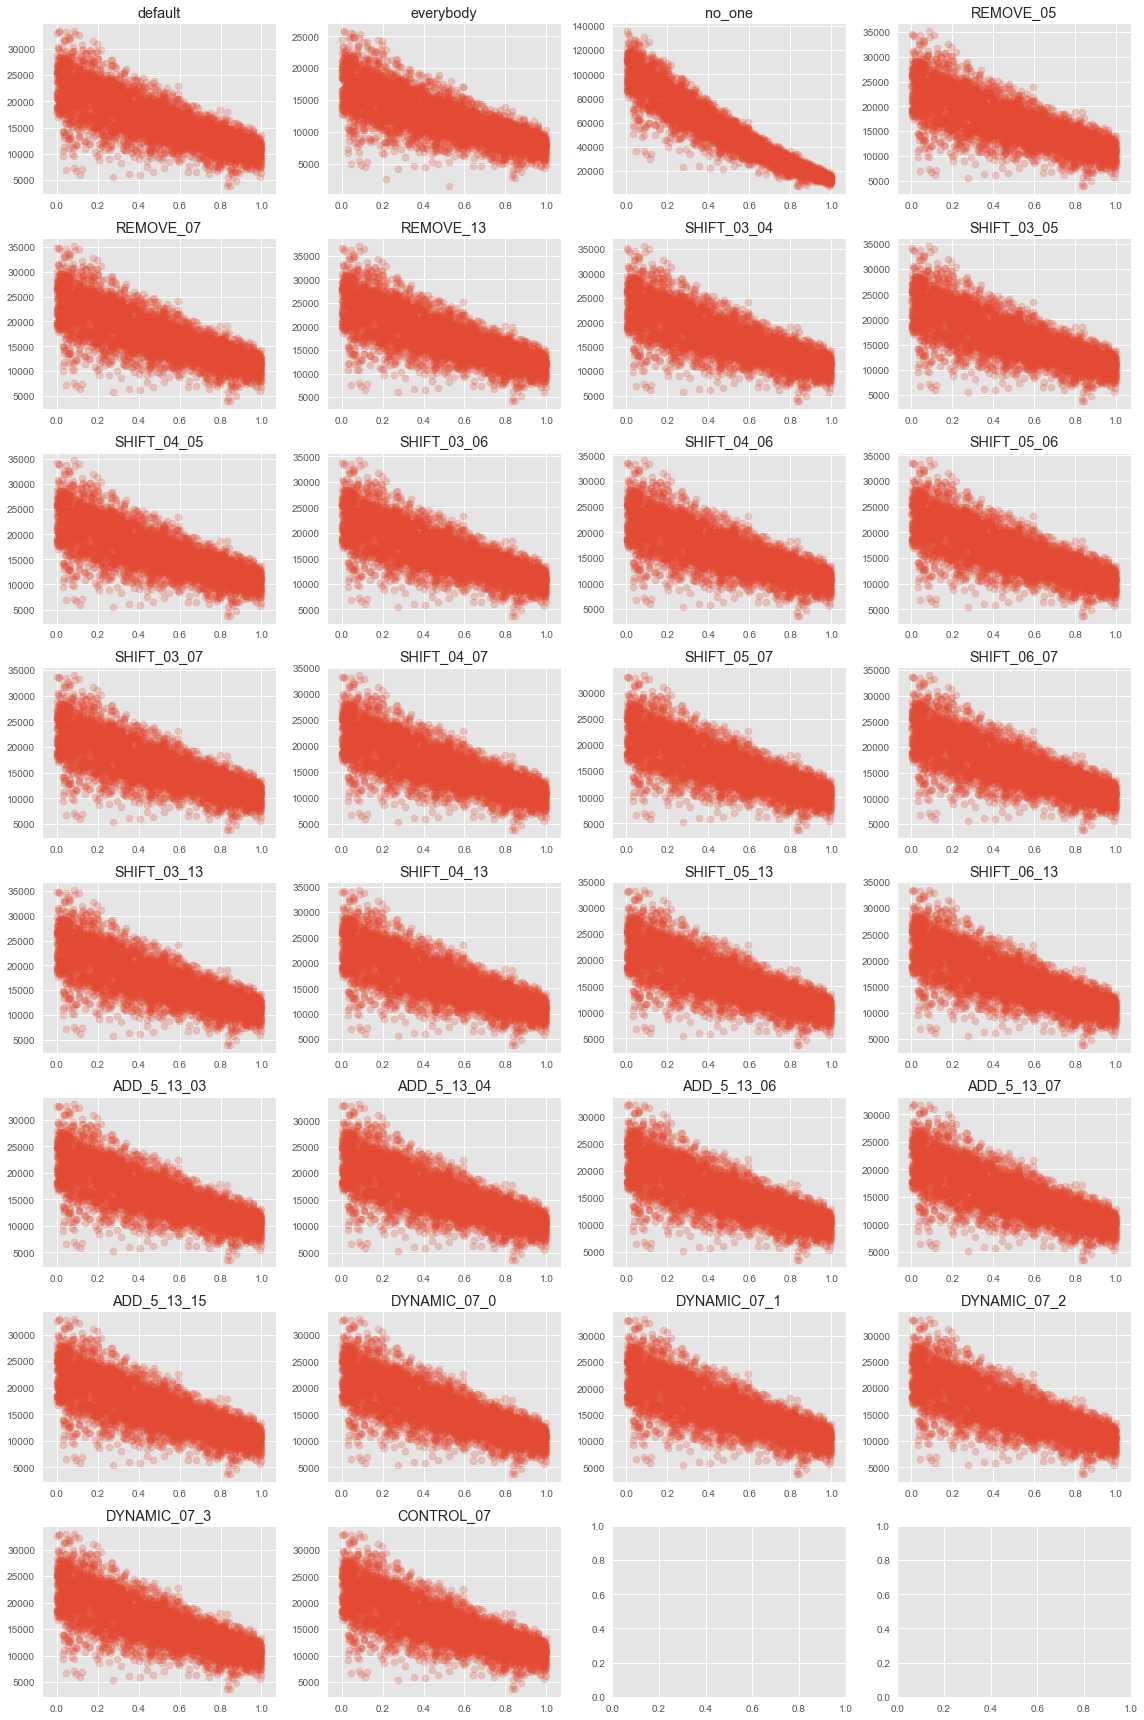

In [11]:
cols = 4
rows = int(np.ceil(len(simulation['policies'])/cols))
fig, axs = plt.subplots(rows,cols, figsize=(cols*4,rows*3))
axs = np.concatenate(axs)
sick_kids = np.array(policies[0]['sick'])[:,0]
for i in range(simulation['n_policies']):
    policy = policies[i]
    ax = axs[i]
    ax.set_title(policy['name'])
    ax.scatter(cover, np.array(policy['sick'])[:,0]/12, alpha=0.251)
plt.tight_layout()
plt.show()

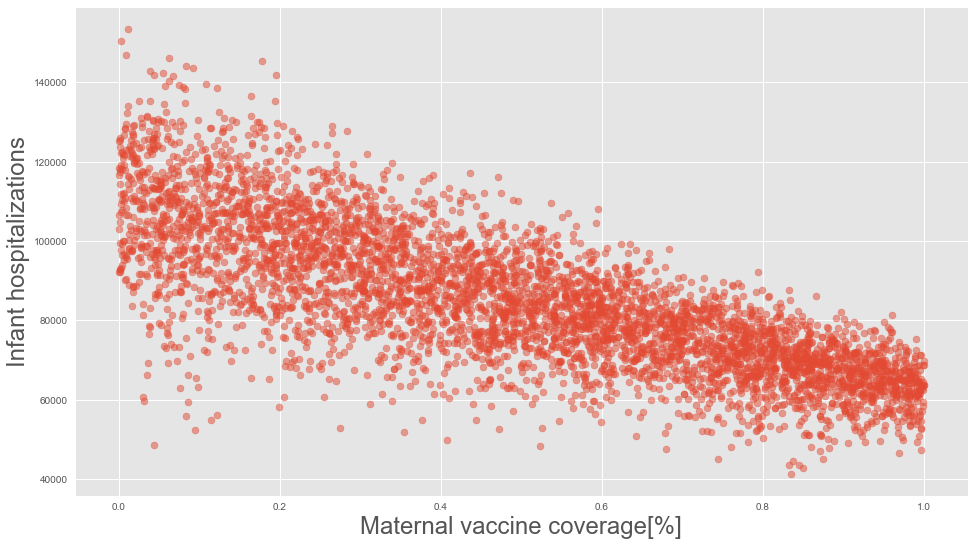

In [60]:
fig, ax = plt.subplots(1,figsize=(16,9))
labels = ['Current program', 'Only maternal vaccine']
for i,n in enumerate([0]):
    policy = policies[n]
    ax.scatter(cover, np.array(policy['hospital']).sum(axis=1), alpha=0.501, label=policy['name'])
#     ax[1].scatter(cover, np.array(policy['sick']).sum(axis=1), alpha=0.501, label='c')
# ax.set_title("Infant Cases")
ax.set_xlabel("Maternal vaccine coverage[%]", fontsize=24)
ax.set_ylabel("Infant hospitalizations", fontsize=24)
# ax.set_ylabel("Infant cases", fontsize=24)
# ax[0].legend(fontsize=16)
# ax[1].legend(fontsize=16)
plt.show()

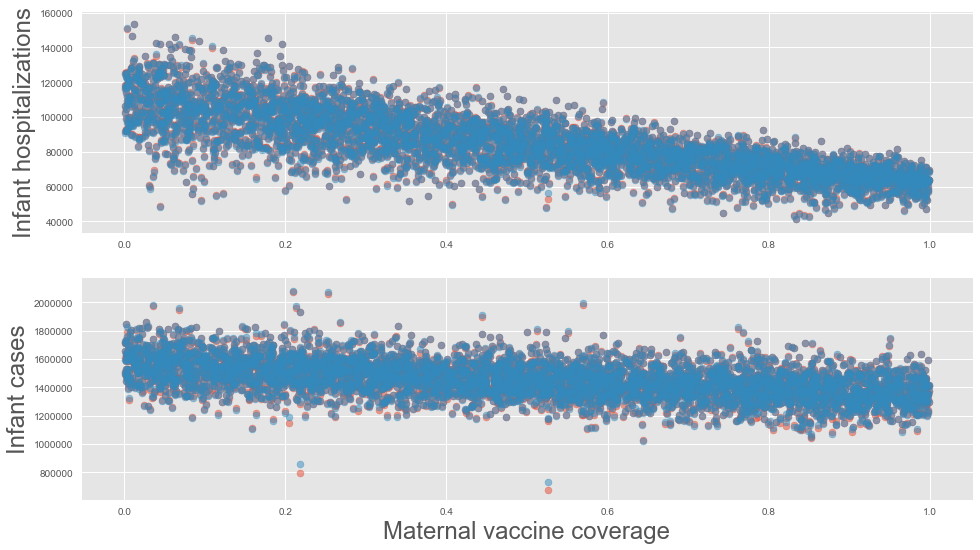

In [55]:
fig, ax = plt.subplots(2,figsize=(16,9))
labels = ['Current program', 'Only maternal vaccine']
for i,n in enumerate([0,18]):
    policy = policies[n]
    ax[0].scatter(cover, np.array(policy['hospital']).sum(axis=1), alpha=0.501, label='h')
    ax[1].scatter(cover, np.array(policy['sick']).sum(axis=1), alpha=0.501, label='c')
# ax.set_title("Infant Cases")
ax[1].set_xlabel("Maternal vaccine coverage", fontsize=24)
ax[0].set_ylabel("Infant hospitalizations", fontsize=24)
ax[1].set_ylabel("Infant cases", fontsize=24)
# ax[0].legend(fontsize=16)
# ax[1].legend(fontsize=16)
plt.show()

In [26]:
from scipy.stats import linregress
m1,n1,r1,p1,err1 = linregress(cover, np.array(policy['hospital'])[:,0])
m2,n2,r2,p2,err2 = linregress(cover, np.array(policy['sick'])[:,0])
xs = np.linspace(0,1,100)
def spline(arrx, arry, interval=0.05):
    l = np.arange(0,1,interval)
    u = np.arange(interval,1+interval,interval)
    line = []
    for a,b in zip (l,u):
        g = arry[(arrx>=a) & (arrx<=b)]
        line.append(g.mean())
    return (l+u)/2, line
        
spline(cover, np.array(policy['hospital'])[:,0])

(array([ 0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,  0.375,  0.425,
         0.475,  0.525,  0.575,  0.625,  0.675,  0.725,  0.775,  0.825,  0.875,
         0.925,  0.975]),
 [83456.506408696107,
  78235.837853140692,
  77630.298599627728,
  76471.626359181741,
  71535.704487301584,
  70172.011445045064,
  67144.195948067339,
  63801.326839141664,
  62130.495053549093,
  59148.056806266359,
  57822.070751381565,
  55423.810911546345,
  53715.881803167649,
  51099.695127874751,
  48149.790853109582,
  45917.963692668171,
  44730.348768132397,
  42103.179101640591,
  40629.364268306315,
  38789.494334052644])

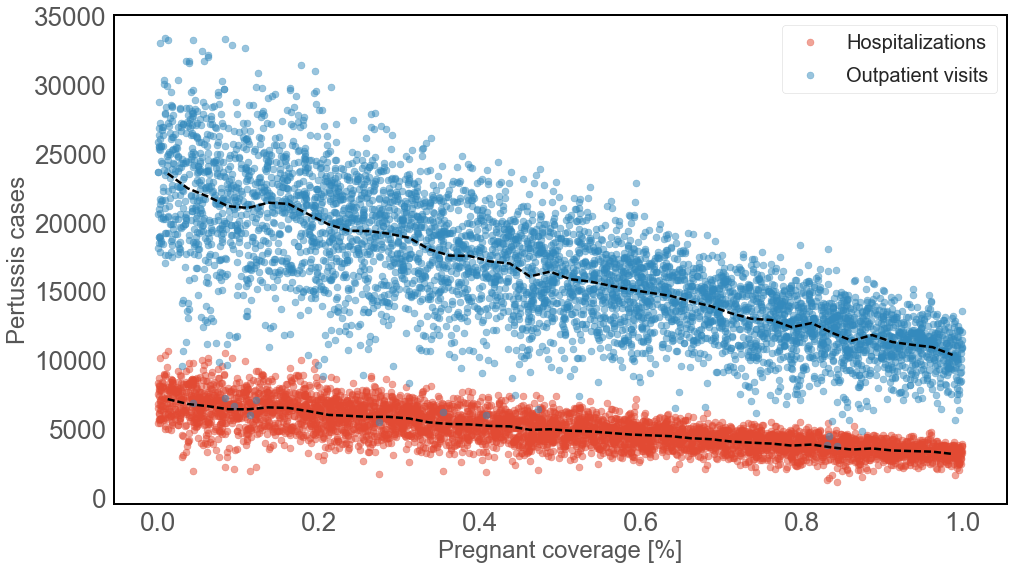

In [32]:
from scipy.stats import linregress
plt.style.use('dean_style.conf')
fig, ax = plt.subplots(figsize=(16,9))
xs = np.linspace(0,1,100)
for n in [0]:
    policy = policies[n]
#     m1,n1,r1,p1,err1 = linregress(cover, np.array(policy['hospital'])[:,0]/12)
#     m2,n2,r2,p2,err2 = linregress(cover, np.array(policy['sick'])[:,0]/12)
#     print (r1,p1,err1)
#     print (r2,p2,err2)
    ax.scatter(cover, np.array(policy['hospital'])[:,0]/12, alpha=0.501, label='Hospitalizations')
#     ax.plot(xs, m1*xs + n1,color='k')
    ax.plot(*spline(cover, np.array(policy['hospital'])[:,0]/12,0.025),color='k',ls='--')
    ax.scatter(cover, np.array(policy['sick'])[:,0]/12, alpha=0.501, label='Outpatient visits')
#     ax.plot(xs, m2*xs + n2,color='k')
    ax.plot(*spline(cover, np.array(policy['sick'])[:,0]/12,0.025),color='k',ls='--')
# l.set_label("AS")
# ax.set_title("Cases")
ax.set_xlabel("Pregnant coverage [%]", fontsize=24)
ax.set_ylabel("Pertussis cases", fontsize=24)
leg = ax.legend(fontsize=20)

plt.show()

## Comparison

In [61]:
metric_diffs = ["{}_diff".format(m) for m in metric_names]
metric_pct = ["{}_pct".format(m) for m in metric_names]
compare_policies = policies[:1] + policies[3:]
policy_names = [policy['name'] for policy in compare_policies]
# bp = [np.array([ix[metric].sum(axis=1) for ix in compare_policies]).T for metric in metric_diffs]
# bp += [np.array([ix['ratio_diff'] for ix in compare_policies]).T]
bp1y = [np.array([ix[metric][:,0] for ix in compare_policies]).T for metric in metric_diffs]
bp = [np.array([ix[metric] for ix in compare_policies]).T for metric in metric_pct]

# DataFrame
df_sick = pd.DataFrame(data=bp[0], columns=policy_names)
df_hospital = pd.DataFrame(data=bp[1], columns=policy_names)
# df_ratio = pd.DataFrame(data=bp[3], columns=policy_names)
df_sick_1y = pd.DataFrame(data=bp1y[0], columns=policy_names)
df_hospital_1y = pd.DataFrame(data=bp1y[1], columns=policy_names)

remove_cols = [col for col in df_hospital.columns if col.count(',')==0]
shift_cols = [col for col in df_hospital.columns if col.count(',')==1]
add_cols = [col for col in df_hospital.columns if col.count(',')==2]
dynamic_cols = [col for col in df_hospital.columns if "DYNAMIC" in col]
control_cols = [col for col in df_hospital.columns if "CONTROL" in col]

In [24]:
policies[18]['hospital_pct'].max()

2.318474351922748

In [34]:
# Font
fontdict={'fontsize':12}
# colors
colors = {}
for p in policies:
    name = p['name']
    if 'REMOVE' in name:
        colors[name] = 'C0'
    elif 'SHIFT' in name:
        colors[name] = 'C1'
    elif 'ADD' in name:
        colors[name] = 'C4'
    elif 'DYNAMIC' in name:
        colors[name] = 'C5'
    elif 'CONTROL' in name:
        colors[name] = 'C6'
    else:
        colors[name] = 'C3'

### Cases

NameError: name 'df_sick_1y' is not defined

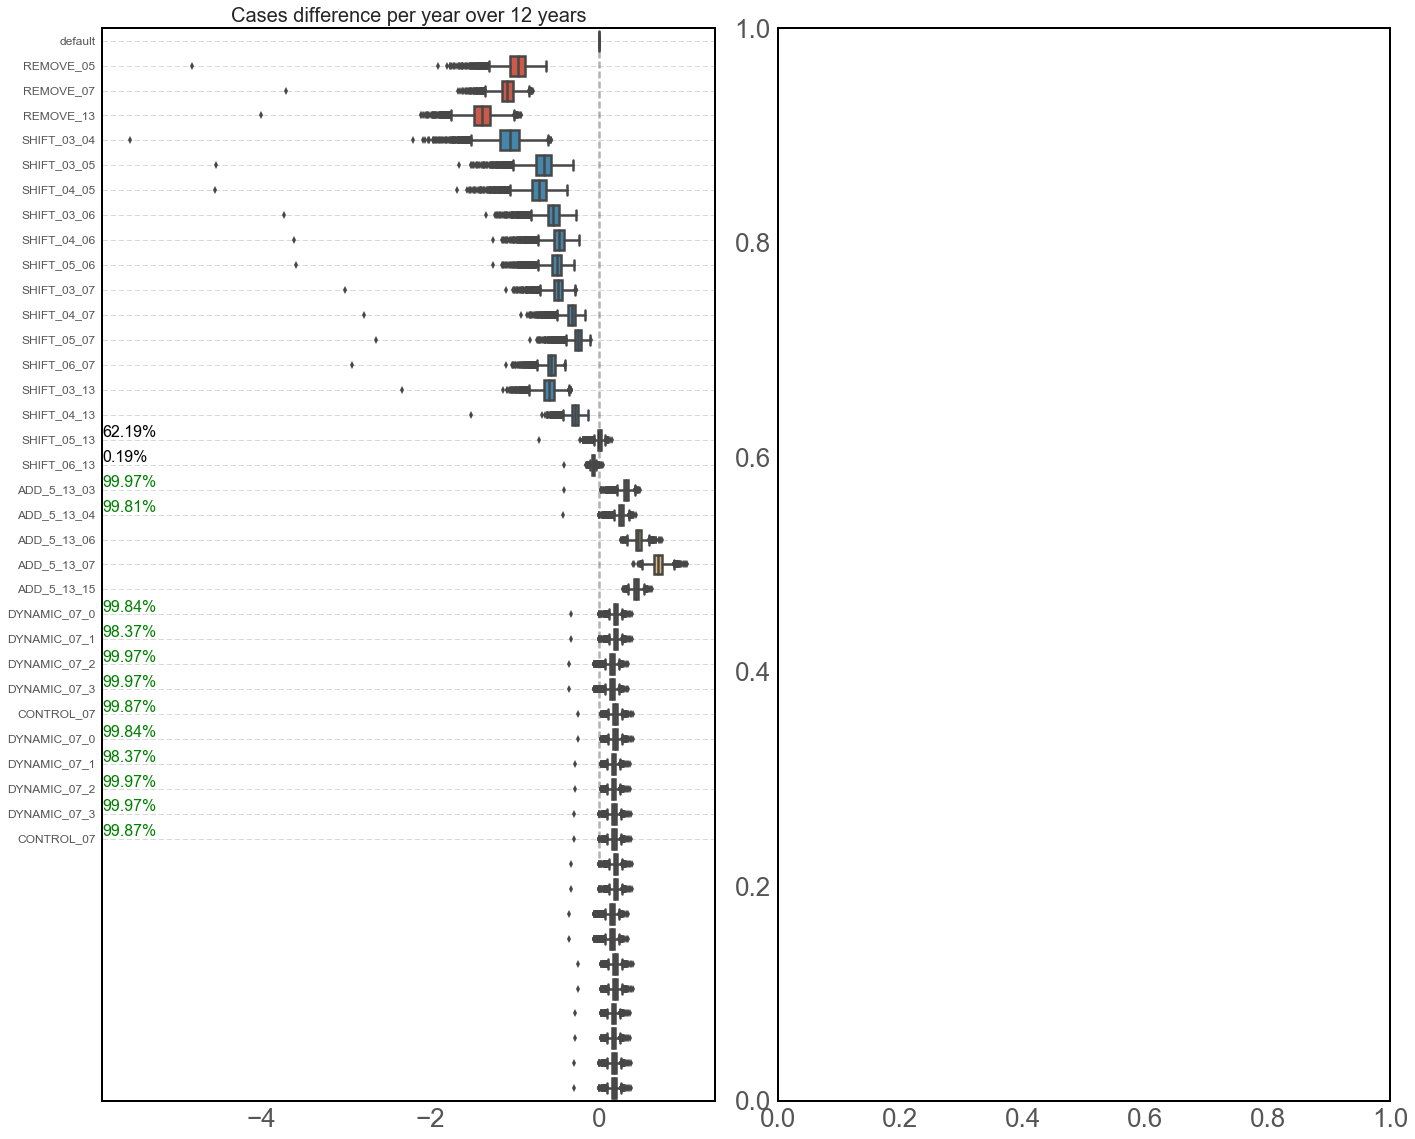

In [35]:
cols = []
cols += remove_cols
cols += shift_cols
cols += add_cols
cols += dynamic_cols
cols += control_cols
fig, axs = plt.subplots(1,2, figsize=(20,16))
policy_comparison(df_sick[cover>.25][cols]/12, colors, ax=axs[0])
axs[0].set_title("Cases difference per year over 12 years")
policy_comparison(df_sick_1y[cover>.25][cols]/12, colors, ax=axs[1])
axs[1].set_title("Infant Cases difference per year over 12 years")
plt.show()

0.033760031966982705
0.072


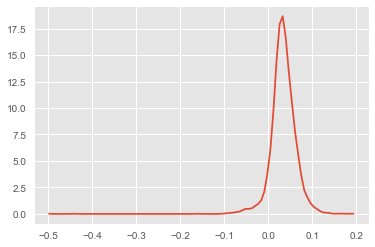

In [12]:
tmp = df_hospital['SHIFT_05_13'] / 12
print(tmp.mean())
print((tmp<0).mean())
density  = kde(tmp)
xs = np.linspace(tmp.min(), tmp.max(), 100)
plt.plot(xs, density(xs))

### Hospitalizations

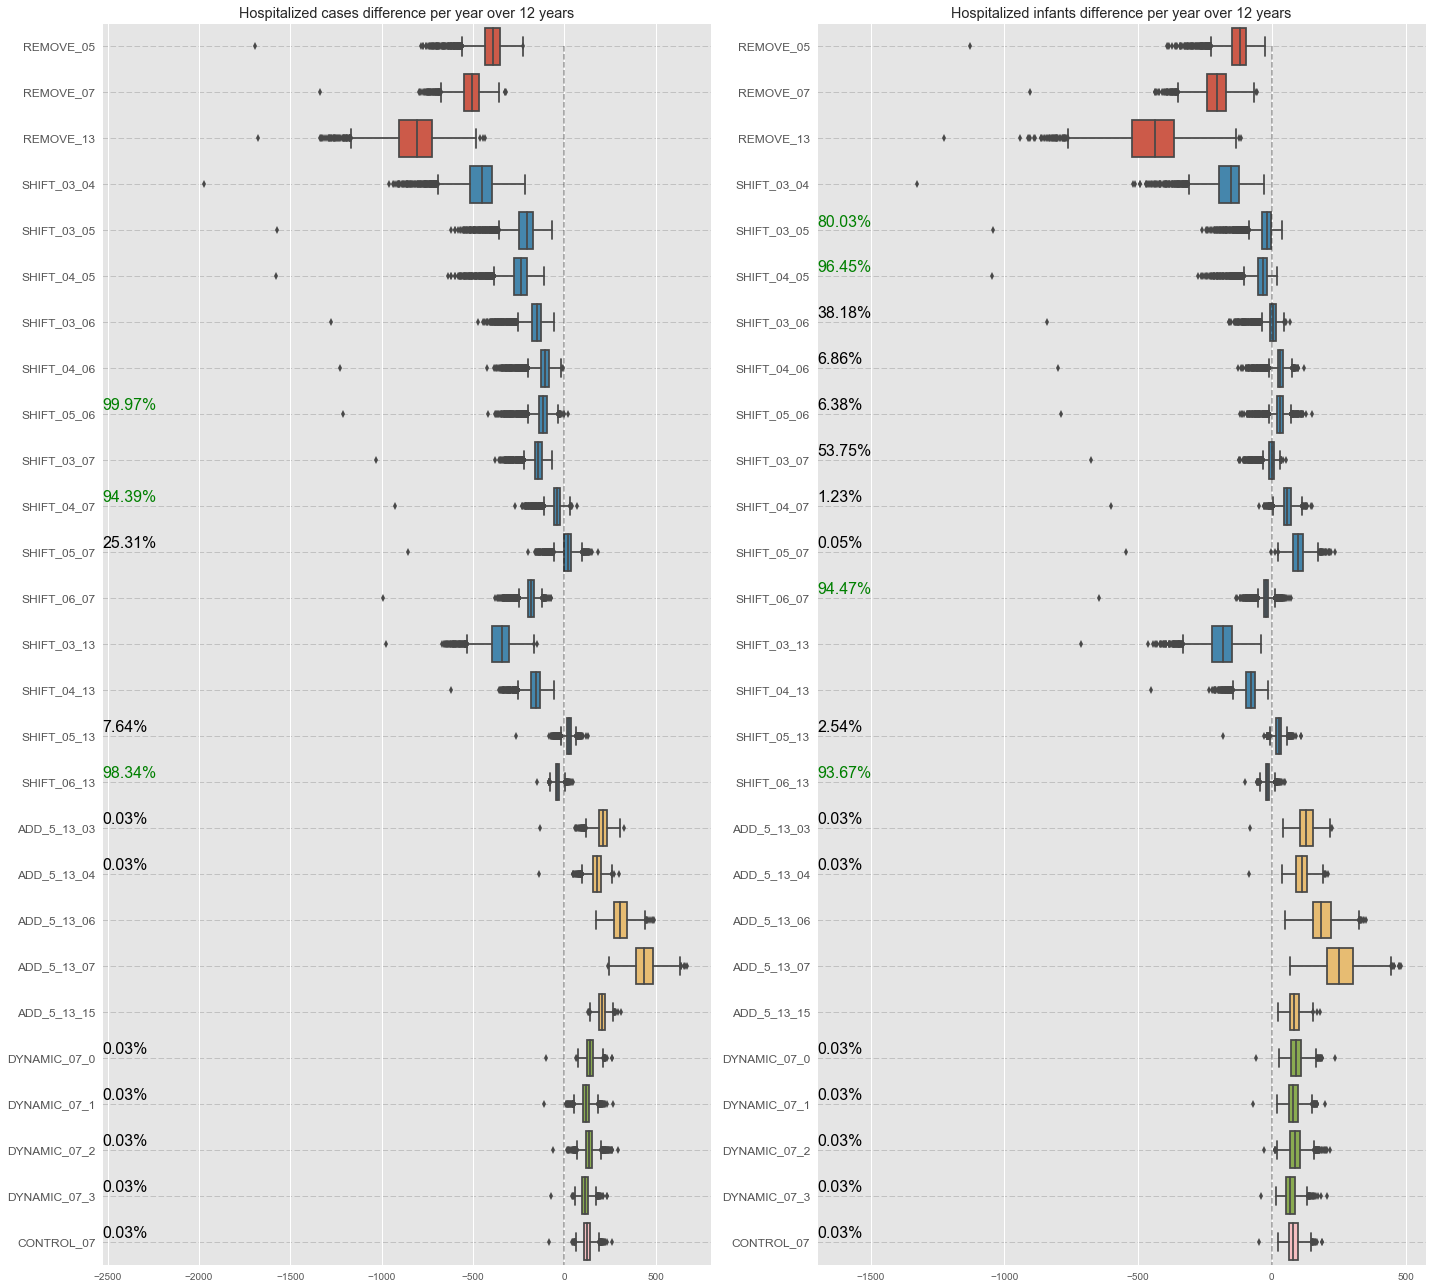

In [19]:
cols = []
cols += remove_cols
cols += shift_cols
cols += add_cols
cols += dynamic_cols
cols += control_cols
fig, axs = plt.subplots(1,2, figsize=(20,18))
policy_comparison(df_hospital[cover>.25][cols]/12, colors, ax=axs[0])
axs[0].set_title("Hospitalized cases difference per year over 12 years")
policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs[1])
axs[1].set_title("Hospitalized infants difference per year over 12 years")
try:
    policy_comparison(df_hospital_1y[cover<.20][cols]/12, colors, ax=axs[2])
    axs[2].set_title("Hospitalized infants difference per year over 12 years")
except: pass
plt.show()

## PAPER

### 3. Shift

Text(0,0,'')


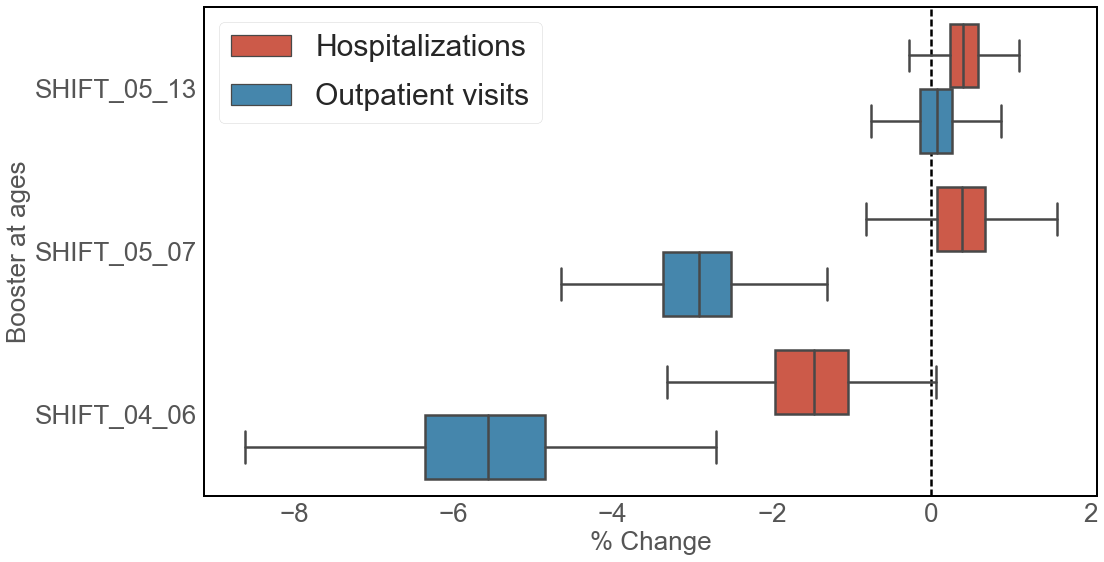

In [80]:
chosen_cols = ['SHIFT_05_13', 'SHIFT_05_07','SHIFT_04_06']#,'h']
dfa = pd.melt(df_sick[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital[cover>0.0], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1)
sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False)
leg = ax.get_legend()
leg.set_title('')
print(leg.get_title())
ax.set_ylabel("Booster at ages")
ax.set_xlabel("% Change")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)
# plt.boxplot()

In [55]:
# # Take only 99%
# font_title = {"fontsize":24}
# df_sick['h'] = 'sick' 
# df_hospital['h'] = 'hospital'
# chosen_cols = ['SHIFT_05_13', 'SHIFT_05_07','SHIFT_04_06']#,'h']
# # chosen_cols = ['05,13', '05,07','04,06']#,'h']
# fig, axs = plt.subplots(1,2,figsize=(20,9))

# df_sick['h'] = 1 
# df_hospital['h'] = 0
# # df_draw = pd.concat((df_sick[chosen_cols][cover>.25], df_hospital[chosen_cols][cover>.25]))
# policy_comparison(df_sick[chosen_cols][cover>.55], colors, ax=axs[0])
# # axs[0,0].set_title("Cases difference per year over 12 years", fontdict=font_title)
# policy_comparison(df_hospital[chosen_cols][cover>.55], colors, ax=axs[1])
# # axs[0,1].set_title("Hospitalized cases difference per year over 12 years", fontdict=font_title)
# # sns.boxplot(data=df_draw, ax=ax)
# # policy_comparison(df_sick[add_cols][cover>.25]/12, colors, ax=axs[1,0])
# # # axs[1,0].set_title("Cases difference per year over 12 years", fontdict=font_title)
# # policy_comparison(df_hospital[add_cols][cover>.25]/12, colors, ax=axs[1,1])
# # # axs[1,1].set_title("Hospitalized cases difference per year over 12 years", fontdict=font_title)
# plt.show()

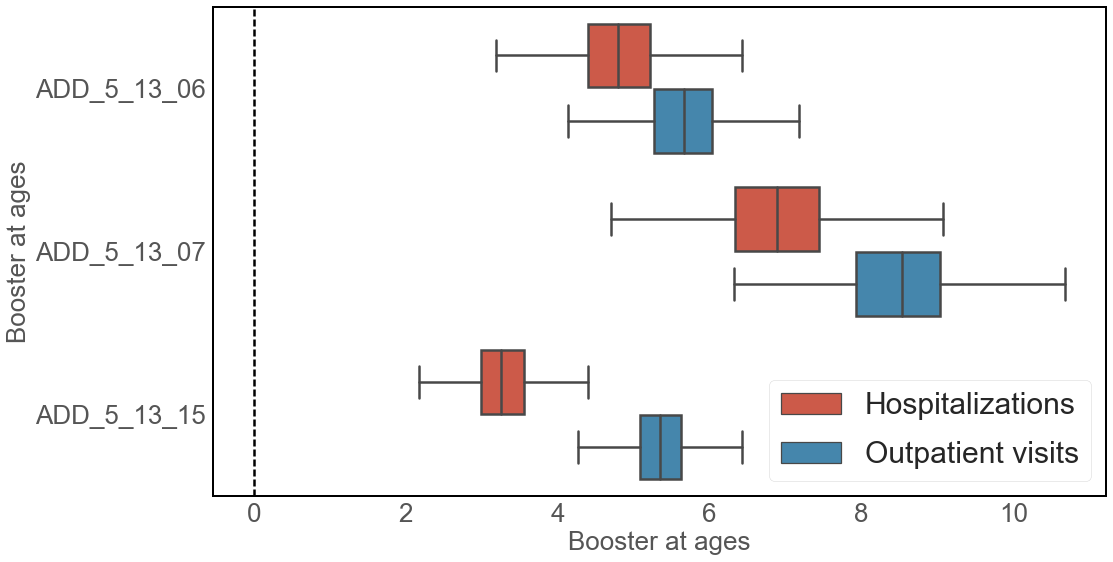

In [81]:
chosen_cols = ['ADD_5_13_06', 'ADD_5_13_07','ADD_5_13_15']
dfa = pd.melt(df_sick[cover>0.55], value_vars = chosen_cols, var_name="Policy")
dfb = pd.melt(df_hospital[cover>0.55], value_vars = chosen_cols, var_name="Policy")
dfa['h'] = 'Outpatient visits'
dfb['h'] = 'Hospitalizations'

fig, ax = plt.subplots(figsize=(16,9))
# sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax)
sns.boxplot(data = pd.concat((dfb,dfa)), hue='h', y='Policy', x='value', orient='h', ax=ax, whis=1.5,showfliers=False)
leg = ax.get_legend()
leg.set_title('')
ax.set_ylabel("Booster at ages")
ax.set_xlabel("Booster at ages")
ax.vlines(0,*ax.get_ylim(),linestyles='--',zorder=0)

In [54]:
# # Take only 99%
# font_title = {"fontsize":24}

# fig, axs = plt.subplots(1,2, figsize=(20,9))
# chosen_cols = ['ADD_5_13_06', 'ADD_5_13_07','ADD_5_13_15']
# # chosen_cols = ['SHIFT_05_13', 'SHIFT_05_07','SHIFT_04_06']
# policy_comparison(df_sick[chosen_cols][cover>.25]/12, colors, ax=axs[0])
# # axs[0,0].set_title("Cases difference per year over 12 years", fontdict=font_title)
# policy_comparison(df_hospital[chosen_cols][cover>.25]/12, colors, ax=axs[1])
# # axs[0,1].set_title("Hospitalized cases difference per year over 12 years", fontdict=font_title)

# # policy_comparison(df_sick[add_cols][cover>.25]/12, colors, ax=axs[1,0])
# # # axs[1,0].set_title("Cases difference per year over 12 years", fontdict=font_title)
# # policy_comparison(df_hospital[add_cols][cover>.25]/12, colors, ax=axs[1,1])
# # # axs[1,1].set_title("Hospitalized cases difference per year over 12 years", fontdict=font_title)
# plt.show()

### Per Dose

5932.02979405
[ 4912.9212  6984.603 ]


<function matplotlib.pyplot.show>

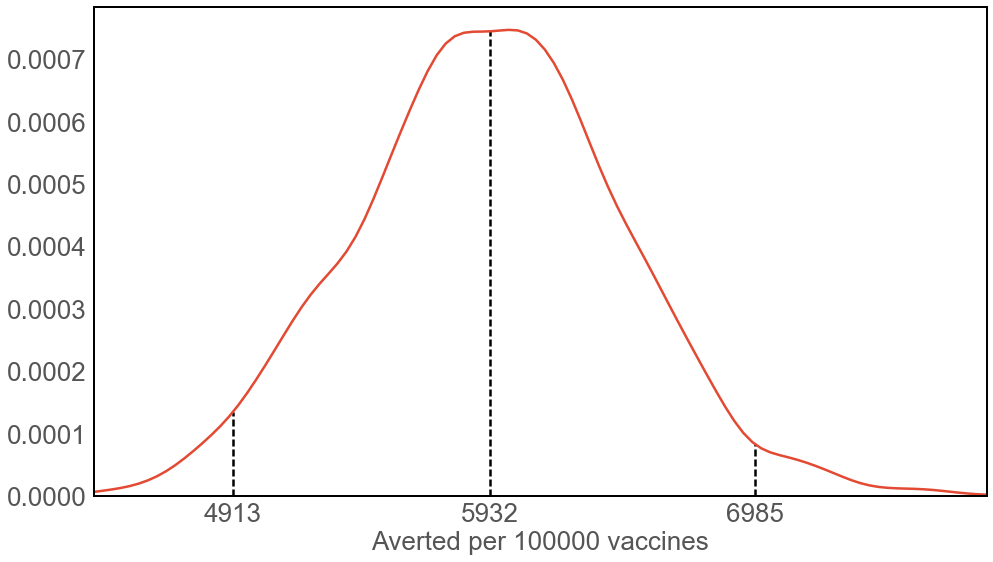

In [97]:
# df_comp = df_hospital
base = [p for p in policies if p['name'] == 'SHIFT_05_13'][0]
additional = [p for p in policies if p['name'] == 'ADD_5_13_07'][0]
base_s = np.array(base['sick']).sum(axis=1)
additional_s = np.array(additional['sick']).sum(axis=1)
base_h = np.array(base['hospital']).sum(axis=1)
additional_h = np.array(additional['hospital']).sum(axis=1)
# FORMULA
price = 605 * (base_h - additional_h) + 76.15 * (base_s - additional_s)
#####################################
base_v = np.array(base['vaccines']).sum(axis=1)
additional_v = np.array(additional['vaccines']).sum(axis=1)
# Per Dose
# per_dose = 1000 * (-additional_h + base_h) / (additional_v - base_v)
per_dose = 1000 * price / (additional_v - base_v)
# Plot
per_dose_mean = per_dose.mean()
print(per_dose_mean)
# print((per_dose<0).mean())
density  = kde(per_dose)
xs = np.linspace(per_dose.min(), per_dose.max(), 100)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(xs, density(xs))
# ax.set_title("Per dose distribution",fontdict=font_title)
ax.vlines(per_dose_mean,0,density(per_dose_mean),linestyle='--')
qs = mquantiles(per_dose, [0.025,0.975])
ax.vlines(qs,0,density(qs),linestyle='--')
ax.set_xlabel("Averted per 100000 vaccines")
print (qs)
ax.set_xticks(np.hstack((np.array(qs),np.array(per_dose_mean))))
ax.set_ylim(bottom=0)
ax.set_xlim(per_dose.min(), per_dose.max())
plt.show

### Dynamic Policy

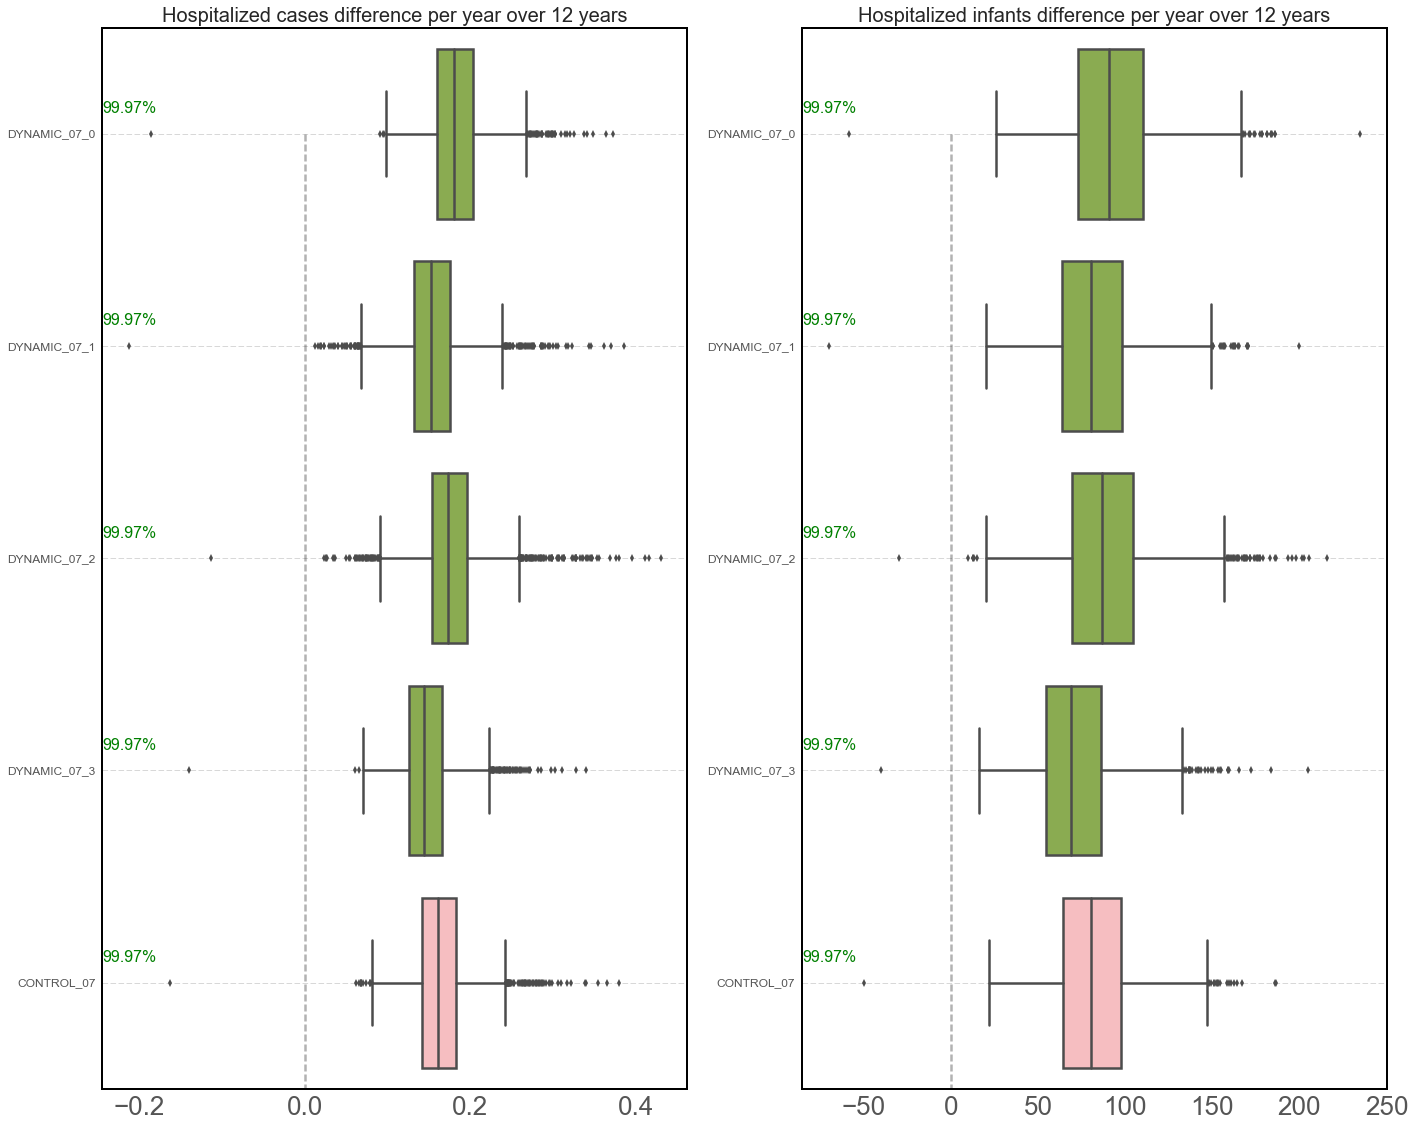

In [62]:
cols = []
# cols += remove_cols
# cols += shift_cols
# cols += add_cols
cols += dynamic_cols
cols += control_cols
fig, axs = plt.subplots(1,2, figsize=(20,16))
policy_comparison(df_hospital[cover>.25][cols]/12, colors, ax=axs[0])
axs[0].set_title("Hospitalized cases difference per year over 12 years")
policy_comparison(df_hospital_1y[cover>.25][cols]/12, colors, ax=axs[1])
axs[1].set_title("Hospitalized infants difference per year over 12 years")
try:
    policy_comparison(df_hospital_1y[cover<.20][cols]/12, colors, ax=axs[2])
    axs[2].set_title("Hospitalized infants difference per year over 12 years")
except: pass
plt.show()

In [670]:
ax.get_xticks()[::2]

array([ 1.,  2.,  3.,  4.,  5.])

In [675]:
np.hstack((ax.get_xticks()[::2],np.array(qs),np.array(per_dose_mean)))

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,  1.75663504,  3.49321468,  2.53469519])

## Correlations

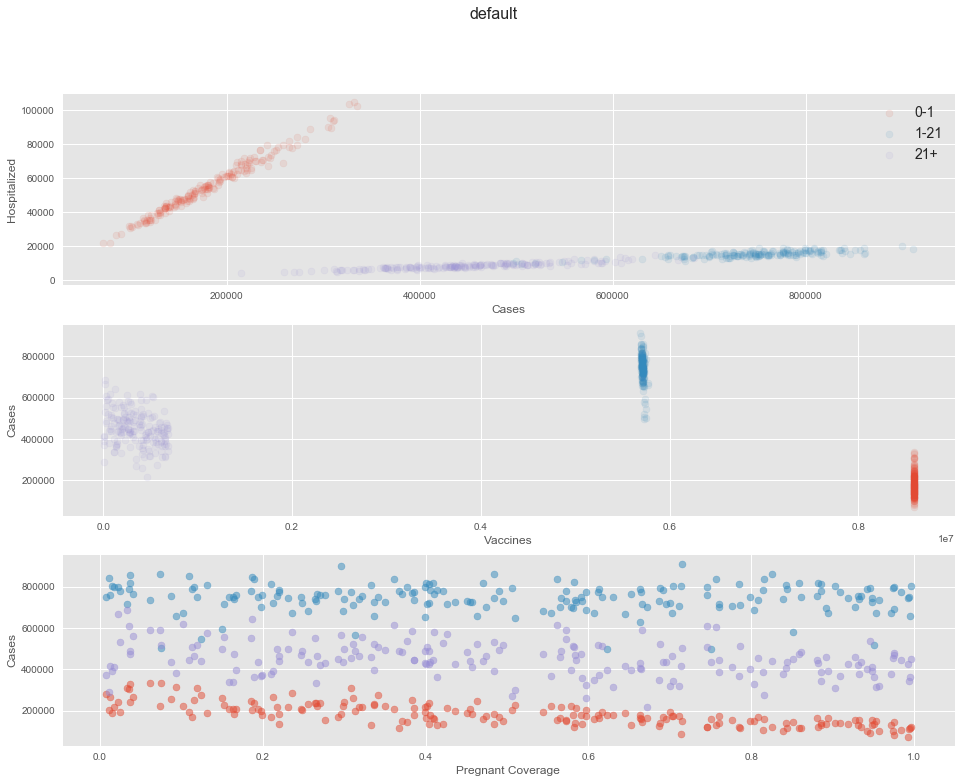

In [24]:
fig, ax = plt.subplots(3,figsize=(16,12))
policy = policies[0]
fig.suptitle(policy['name'], fontsize = 16)   
for i in range(3):
    ax[0].scatter(np.array(policy['sick'])[:,i], np.array(policy['hospital'])[:,i], label=age_names[i], alpha=0.1)
    ax[1].scatter(np.array(policy['vaccines'])[:,i], np.array(policy['sick'])[:,i], label=age_names[i], alpha=0.1)
    ax[2].scatter(simulation['pregnant_coverage'], np.array(policy['sick'])[:,i], label=age_names[i], alpha=0.5)
ax[0].set_xlabel('Cases')
ax[0].set_ylabel('Hospitalized')
ax[1].set_xlabel('Vaccines')
ax[1].set_ylabel('Cases')
ax[2].set_xlabel('Pregnant Coverage')
ax[2].set_ylabel('Cases')
                        
ax[0].legend(fontsize=14)
plt.show()

## Histogram

TypeError: string indices must be integers

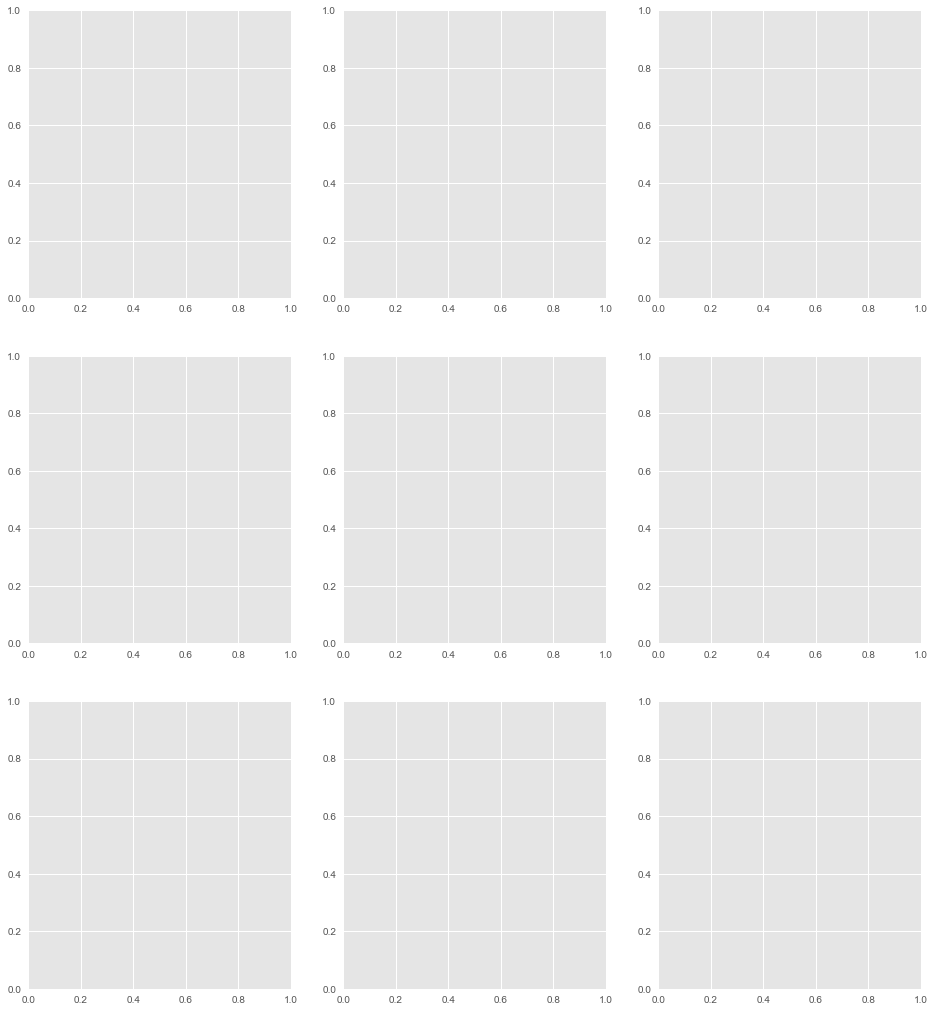

In [38]:
fig, axs = plt.subplots(3,3,figsize=(16,18))
policy = best_policiy
for i, metric in enumerate(metric_names): # i - i is ax row: result type
#     print me`
    for age in range(3): # j is age
        arr = np.array(policy[metric])[:,age]
        ax = axs[i,age]
        ax.hist(arr)
        m = ax.get_ylim()[1]
        ax.vlines(np.median(arr), 0, m)
        ax.set_title('{} {} {:.2f}'.format(metric,age_names[age], np.median(arr)))


# Predict

In [305]:
np.set_printoptions(edgeitems=10, linewidth=120, suppress=True, precision=8)

In [455]:
take_subsets(mcmc)

Effective sample size: [ 1431.51012568  1795.83358568  1326.0910086   1742.72817132]
[10000 19000 28000]
Subset length: 3


In [481]:
predict_soon(simulation, r=12)

L 3



In [702]:
more = 48
subset_chain = mcmc['chain_subset']
subset_states = mcmc['state_z_subset']
l = len(subset_chain)
pick = 1
# state_0 = subset_states[pick, :]
# state_0 = np.split(state_0, 10)
params = mcmc['initial_guess'].copy()
params[mcmc['active_params']] = subset_chain[pick, :]
# params[2] = 1
print (params)
print(subset_chain[pick, :])
print(mcmc['chain'][mcmc['picks'][pick], :])
om, phi, rho, f1, f2, f3 = params
z = test_model(mcmc['state_0'], mcmc['start'], mcmc['end'] + more, *params ,e=1, r=3, r_0=40,years_prior=10)[0]

[  3.9805       2.10470189  70.           0.00077051   0.00019133   0.00004795]
[ 2.10470189  0.00077051  0.00019133  0.00004795]
[ 2.10470189  0.00077051  0.00019133  0.00004795]
[  1.26654058e+08   1.26510227e+08   1.25966183e+08   1.25523091e+08   1.25024246e+08   1.24574698e+08   7.37566410e+08
   7.26273077e+08   7.14495693e+08   7.03504373e+08   6.90006174e+08   6.79113160e+08   6.68453624e+08   6.72525423e+08
   6.48692076e+08   6.37735721e+08   6.27901811e+08   6.18309494e+08   1.20188990e+09   1.76204966e+09   1.64894907e+09
   2.08320299e+09   4.60981169e+09   3.99596203e+09   3.39561825e+09   2.78185350e+09   4.40358366e+09]


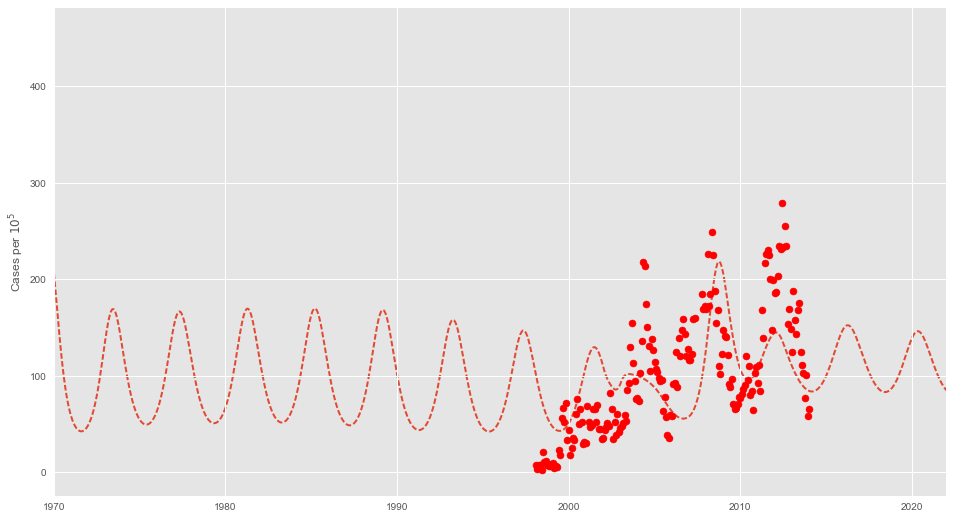

In [711]:
# more = 16
plot_data = mcmc['datax'].copy()
plot_data[mcmc['datax'] > 150] = np.nan
sampled = mcmc['y_hat_M'][mcmc['picks'],:,:].copy()
fig, axs = plt.subplots(1, figsize=(16, 9))
ax = axs
# for curr_model in sampled[:3]:

#     ax.plot(mcmc['datay'], curr_model.sum(axis=0), color='grey', alpha=0.93)
# for pred_model in mcmc['prediction']:
#     ax.plot(np.linspace(2014+1/12,2014+2*more,12*2*more), pred_model.sum(axis=0)[0:], color='grey', alpha=0.93)
ax.plot(np.linspace(1948+1/12,2014+more,len(z.sum(axis=0))), z.sum(axis=0),'--',zorder=0,lw=2)

ax.scatter(mcmc['datay'], plot_data.sum(axis=0), c='red', zorder=5)
ax.set_ylabel("Cases per $10^5$")
# ax.set_xlim(2013.9,2015)
ax.set_xlim(1970,2022)
# ax.set_ylim(bottom=0)
plt.show()

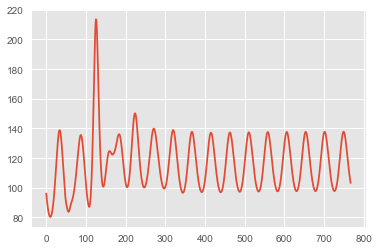

In [451]:
plt.plot(z.sum(axis=0))

In [701]:
def test_model(state_0, start, end,
              om, phi, rho, f1, f2, f3, e=1,
              r=3, r_0=20, years_prior=10):
    no_likelihood = -np.inf * np.ones((3, 192)), -np.inf * np.ones(270)
    # fix and set params
    f = np.concatenate((nums(f1, sc[0]), nums(f2, sc[1]), nums(f3, sc[2])))
    phi = phi % (2 * np.pi)
    # Run first few years on high resolution
    y_0 = difference_model(state_0, start - years_prior, start,
                           rho, om, phi, f, e,
                           r=r_0, full_output=True)
    if type(y_0) == str:
        logger.error('Model exited at WARM UP')
        return no_likelihood
    # Take Main state_0 as last state of initial years
    state_0 = [yi[:, -1] for yi in y_0]
    # Run model
    y = difference_model(state_0, start, end,
                         rho, om, phi, f, e,
                         r=r, full_output=True)
    if type(y) == str:
        print('Model exited at MAIN')
        return no_likelihood
    # If under 5 are not very 4/6 in the R comp. return no likelihood
    # Compute where the cut is
    tmp_cut = np.arange(int(r / N * (1953 - start)),
                        int(r / N * (1957 - start)))
    # Compute Total in the point, and R in the point - needed age is 5 (point 9)
    R, A = y[5], y[7]
#     return A, R
    print(A.sum(axis=1))
    tmp_R = R[9, tmp_cut]  # 9 is the needed age group
    tmp_A = A[9, tmp_cut]
    mean_sick = (tmp_R / tmp_A).mean()
    # exit()
    # Test condition
    if mean_sick <= 0.7:
        logger.error('Not enough sick kids, {:.2f}'.format(mean_sick))
        return no_likelihood
    # Save last state
    state_z = [yi[:, -1] for yi in y]
    state_z = np.concatenate(state_z)
    y = y[-1]  # NEW SICK is the last one
    # Take result and sum values according to susceptibility
    y = np.split(y, np.cumsum(sc)[:-1])
    y = [yi.sum(axis=0) for yi in y]
    y = [yi / A.sum(axis=0) for yi in y]
    # print((y[1]/A.sum(axis=0)).shape)
    y = [np.sum(yi.reshape(-1, r), axis=1) for yi in y]
    y = np.array(y) * 10 ** 5

    # Monthly
    # Slices relevant for months data
    start_ix = (1948 - start) * 12
    end_ix = (2014 + more - start) * 12
    monthly = y[:, start_ix:end_ix]
    
    return monthly, state_z


In [379]:
mcmc['end']

2014